<a href="https://colab.research.google.com/github/kfahn22/computer-vision-course/blob/synthetic-data-creation-sdxl-turbo/synthetic_data_creation_sdxl_turbo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating a Synthetic Dataset with sdxl-turbo

* This notebook demonstrates how to generate a synthetic dataset using the [stabilityai/sdxl-turbo](https://github.com/Stability-AI/generative-models) text2img model.   This model was introduced in [Adversarial Diffusion Distillation](https://arxiv.org/pdf/2311.17042.pdf), Sauer, et. all. This model is a hybrid diffusor model that adds the advesarial loss found in GANs to speed up image generation.

* We will generate [fractal flame](https://en.wikipedia.org/wiki/Fractal_flame) images.  A [fractal](https://fractalfoundation.org/resources/what-are-fractals/) is a repeating pattern that looks the same no matter how much you zoom in or out. The "flames" part in fractal flames is just a fancy name for the colorful and dynamic patterns you can created by the recursive path taken to render the images.

* The model weights are downloaded from the Hugging Face Hub.  This notebook is based on the code [here](https://huggingface.co/docs/diffusers/using-diffusers/sdxl_turbo), where you can learn more about using the stabilityai/sdxl-turbo model.


**Important Notes about this code:**

* An invisible watermark is embedded in the images so they can be identified as AI generated.

* The  notebook was run with T4 High-RAM.

First, let's install the necessary packages.

In [ ]:
#!pip install diffusers transformers ftfy accelerate huggingface_hub torchvision imagehash datasets
!pip install -q diffusers transformers accelerate omegaconf torchvision imagehash datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 49.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 13.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.6 MB/s eta 0:00:00


## Let's log into the Hugging Face hub to get access to the model.

In [42]:
!pip install huggingface_hub datasets os

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [46]:
import os
generated_images_dir = "/content/fractal_flame"
os.makedirs(generated_images_dir, exist_ok=True)

There are several variations on the fractal flame associated with different algorithms.  This notebook generates the hankerchief variation. A fun exercise would be to try a different variation or change the colors.

In [47]:
from diffusers import AutoPipelineForText2Image
import torch
from PIL import Image, ImageShow

pipe = AutoPipelineForText2Image.from_pretrained("stabilityai/sdxl-turbo", torch_dtype=torch.float16, variant="fp16")
pipe.to("cuda")

#Variations:  linear, sinusoidal, swirl, spherical, horseshoe, polar, hankerchief, heart, disc, hyperbolic , fisheye
prompt = "fractal flame, hankerchief variation, in shades of cherry red, orange, and fushia, vibrant colors, 8K"

num_images_to_generate = 100
images = []

for idx in range(num_images_to_generate):
    image = pipe(prompt=prompt, num_inference_steps=1, guidance_scale=1.0).images[0]
    image.save(f"fractal_flame/image_{idx}.png")
    images.append(image)


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

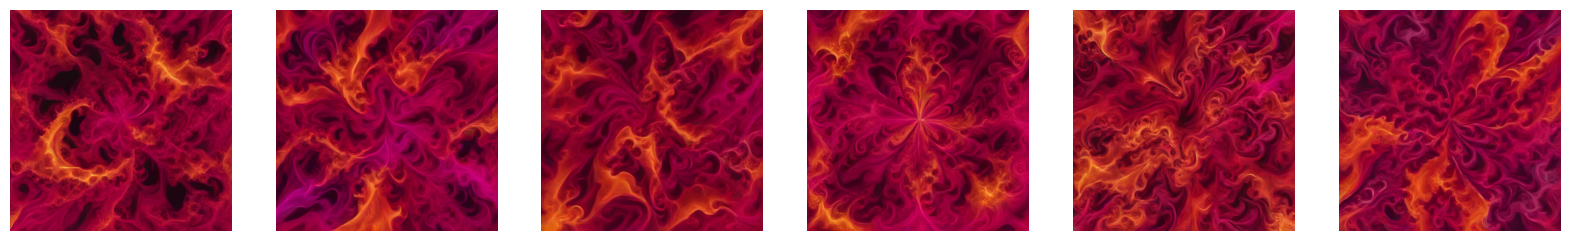

In [48]:
import math
import matplotlib.pyplot as plt

num_images_to_display = 6

def plot_images(images, title=None):
    plt.figure(figsize=(20, 20))
    for i in range(num_images_to_display):
        ax = plt.subplot(1, num_images_to_display, i+1)
        if title is not None:
            plt.title(title)
        plt.imshow(images[i])
        plt.axis("off")

plot_images(images)

## Pushing the dataset to the Hugging Face Hub

Now that we have generated our dataset, let's add it to the Hugging Face hub.

In [41]:
!apt-get install git-lfs

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git-lfs is already the newest version (3.0.2-1ubuntu0.2).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


## Let's login in with our WRITE acess token.

In [43]:
from huggingface_hub import notebook_login

notebook_login()

## Load our dataset

In [49]:
from datasets import load_dataset
dataset = load_dataset("imagefolder", data_dir="fractal_flame")

Resolving data files:   0%|          | 0/100 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

## Now we can push the dataset to the Hub.

In [51]:
user_name = "kfahn"
repo_name = "fractal_flame"

In [52]:
dataset.push_to_hub(f"{user_name}/{repo_name}")

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

CommitInfo(commit_url='https://huggingface.co/datasets/kfahn/fractal_flame/commit/034987faf476827da65c2f1f6223899bad3c09bf', commit_message='Upload dataset', commit_description='', oid='034987faf476827da65c2f1f6223899bad3c09bf', pr_url=None, pr_revision=None, pr_num=None)